In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import wordcloud as wc
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [62]:
dataset='Hackathon_Aug24/V02Max_Combined.xlsx'

Athletes = pd.read_excel(dataset, sheet_name = 'Athletes')
Kayaking = pd.read_excel(dataset, sheet_name = 'Kayaking')
Triathlon = pd.read_excel(dataset, sheet_name = 'Triathlon')
Fencing = pd.read_excel(dataset, sheet_name = 'Fencing')

In [63]:
All_sports=pd.concat([Kayaking, Triathlon, Fencing])

In [64]:
conditions=[
    (All_sports['time']<0),
    (All_sports['time']>0) & (All_sports['power']>0),
    (All_sports['time']>0) & (All_sports['power']<=0)
]
choices=['Warm up','Get','Cool down']

All_sports['stage']=np.select(conditions,choices,default='cool down')

# create a new column stage for 3 parts
All_sports['stage']=np.select(conditions,choices,default='cool down')

In [65]:
print(All_sports)

       ID     time     RR       VO2  power      stage
0      11 -168.600  727.0  0.287147      0    Warm up
1      11 -167.872  728.0  0.287147      0    Warm up
2      11 -167.148  724.0  0.287147      0    Warm up
3      11 -166.484  664.0  0.320580      0    Warm up
4      11 -165.836  648.0  0.320580      0    Warm up
...    ..      ...    ...       ...    ...        ...
27598  10  942.700  428.0  0.786363      0  Cool down
27599  10  943.124  424.0  0.786363      0  Cool down
27600  10  943.552  428.0  0.786363      0  Cool down
27601  10  943.976  424.0  0.786363      0  Cool down
27602  10  944.404  428.0  0.786363      0  Cool down

[52062 rows x 6 columns]


In [66]:
merged_sports=pd.merge(All_sports,Athletes,on='ID',how='inner')
print(merged_sports)

       ID     time     RR       VO2  power      stage  age  Weight  Height  \
0      11 -168.600  727.0  0.287147      0    Warm up   18    84.8     182   
1      11 -167.872  728.0  0.287147      0    Warm up   18    84.8     182   
2      11 -167.148  724.0  0.287147      0    Warm up   18    84.8     182   
3      11 -166.484  664.0  0.320580      0    Warm up   18    84.8     182   
4      11 -165.836  648.0  0.320580      0    Warm up   18    84.8     182   
...    ..      ...    ...       ...    ...        ...  ...     ...     ...   
52057  10  942.700  428.0  0.786363      0  Cool down   14    58.8     177   
52058  10  943.124  424.0  0.786363      0  Cool down   14    58.8     177   
52059  10  943.552  428.0  0.786363      0  Cool down   14    58.8     177   
52060  10  943.976  424.0  0.786363      0  Cool down   14    58.8     177   
52061  10  944.404  428.0  0.786363      0  Cool down   14    58.8     177   

       P_vt1  P_vt2    sport  Gender Ethnicity First Name Last 

### Q1) categorize athelets as Underweight, overweight and NormalWeight and show visualize?

BMI_Category
Normal         11
UnderWeight     4
OverWeight      3
Name: count, dtype: int64


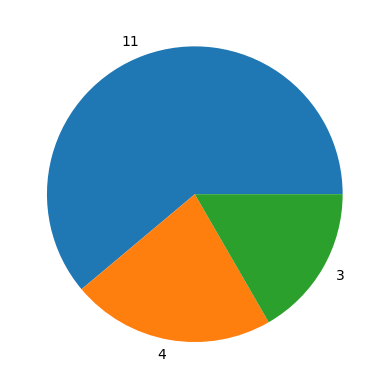

In [68]:
Athletes_bmi=Athletes
for index, row in Athletes_bmi.iterrows():
        Athletes_bmi.at[index, 'BMI'] = round(Athletes_bmi.at[index, 'Weight']/((Athletes_bmi.at[index, 'Height']/100)**2),2)
#print(Athletes_bmi)
def Classify_BMI(bmi):
    if bmi < 18.5:
        return 'UnderWeight'
    elif 18.5 <= bmi <25:
        return 'Normal'
    else:
        return 'OverWeight'
Athletes['BMI_Category']=Athletes['BMI'].apply(Classify_BMI)
#print(Athletes)
category_counts=Athletes['BMI_Category'].value_counts()
print(category_counts)
plt.pie(category_counts, labels = category_counts)
plt.show()
#category_counts.plot(kind='bar')
#plt.xlabel("BMI Category")
#plt.ylabel("No of individuals")
#plt.title("Distribution of BMI Category")

### Q2)scatterplot for Age vs. Time by Sport?

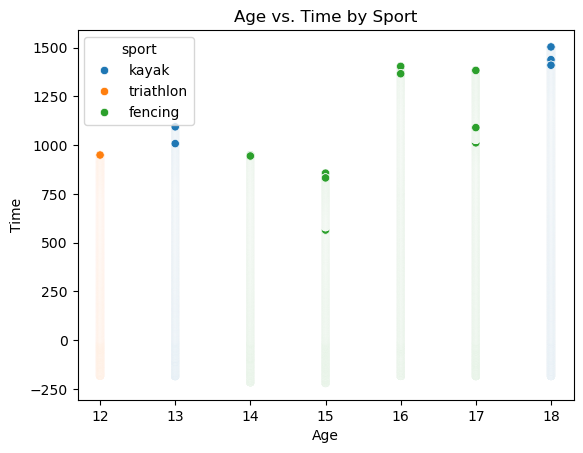

In [70]:
sns.scatterplot(x='age',y='time',hue='sport', data=merged_sports)
plt.xlabel("Age")
plt.ylabel("Time")
plt.title("Age vs. Time by Sport")
plt.show()

### Q3)Heatmap for correlations between numerical columns?

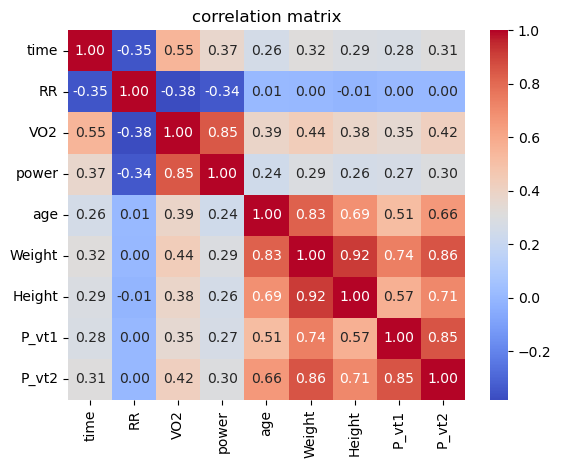

In [72]:
correlation_matrix=merged_sports[['time','RR','VO2','power','age','Weight','Height','P_vt1','P_vt2']].corr()
#print(correlation_matrix)
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title("correlation matrix")
plt.show()

### 4)Time Trends Across Races?

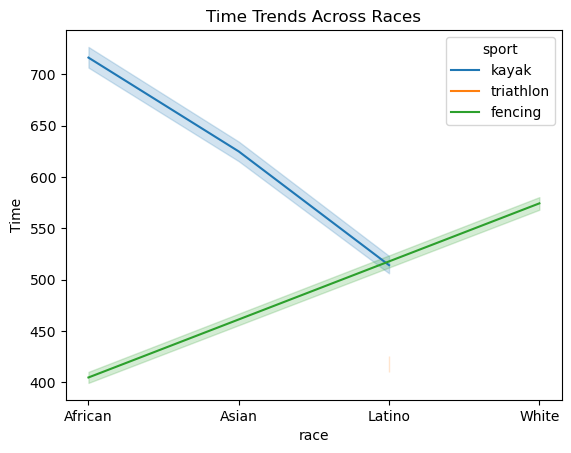

In [74]:
sns.lineplot(x='Ethnicity',y='time',data=merged_sports,hue='sport')
plt.xlabel("race")
plt.ylabel("Time")
plt.title("Time Trends Across Races")
plt.show()

### 5) Plot the relation between cumulative sum of RR and Time

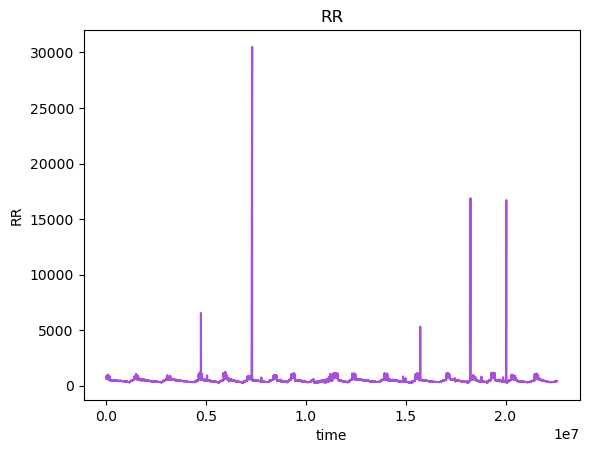

In [76]:
#cummulative sum of rr vs time
plt.title("RR")
plt.xlabel("time")
plt.ylabel("RR")
plt.plot(np.cumsum(All_sports['RR']), All_sports['RR'], label="RR", color="#A651D8")
plt.show()